In [1]:
import tensorflow as tf
#tf.compat.v1.disable_eager_execution()

import numpy as np
from matplotlib import pyplot as plt
import os

from junipr import *

In [2]:
dataset = get_dataset('./data/tfrecord/JuniprJets.tfrecord', 
                      batch_size=500,
                      max_padding=True, #Needed for validation code to work
                      repeat=False, 
                      shuffle=0)

In [3]:
junipr = JUNIPR()

Using SimpleRNN Network


In [4]:
junipr.load_model('./saved_models/Junipr_demo_model.h5')

In [5]:
PYTHIA_val = junipr.validate(dataset, predict=False)

In [6]:
JUNIPR_val = junipr.validate(dataset, predict=True)

# P_end

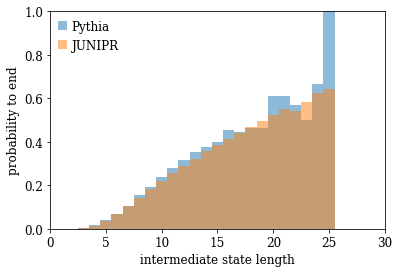

In [7]:
plt.bar(*p_end(PYTHIA_val['endings'], PYTHIA_val['ending_counts']), label = "Pythia", **PLOT_END_SETTINGS)
plt.bar(*p_end(JUNIPR_val['endings'], JUNIPR_val['ending_counts']), label = "JUNIPR", **PLOT_END_SETTINGS)
plt.xticks([0, 5, 10, 15, 20, 25, 30])
plt.axis([0, 30, 0, 1])
plt.xlabel('intermediate state length')
plt.ylabel('probability to end')
plt.legend()
plt.show()

# P_mother

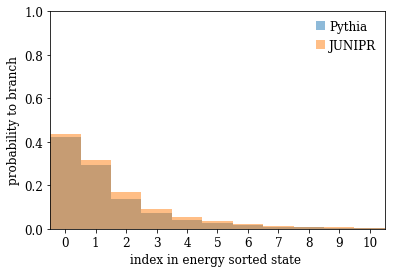

In [8]:
t = None
plt.bar(*p_mother(PYTHIA_val['mothers'], PYTHIA_val['mother_counts'], t=t), label = "Pythia", **PLOT_MOTHTER_SETTINGS)
plt.bar(*p_mother(JUNIPR_val['mothers'], JUNIPR_val['mother_counts'], t=t), label = "JUNIPR", **PLOT_MOTHTER_SETTINGS)
plt.xticks(np.arange(0, 11, 1))
plt.axis([-0.5, 10.5, 0, 1])
plt.xlabel('index in energy sorted state ' + t_label(t))
plt.ylabel('probability to branch')
plt.legend()
plt.show()

# P_branch

## z

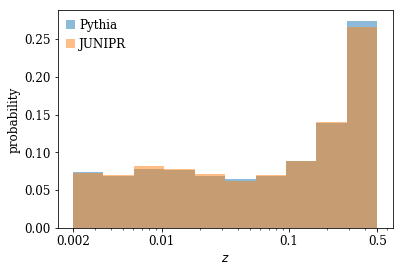

In [9]:
t = None
plt.bar(*p_z(PYTHIA_val['branchings_z'], PYTHIA_val['branchings_counts'], t=t), label = 'Pythia', **PLOT_BRANCH_SETTINGS)
plt.bar(*p_z(JUNIPR_val['branchings_z'], JUNIPR_val['branchings_counts'], t=t), label = 'JUNIPR', **PLOT_BRANCH_SETTINGS)
plt.xscale('log')
plt.xlabel('$z$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.002, 0.01, 0.1, 0.5], [0.002, 0.01, 0.1, 0.5])
plt.legend()
plt.show()

## theta

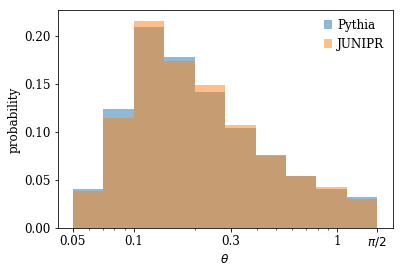

In [10]:
t = None
plt.bar(*p_theta(PYTHIA_val['branchings_t'], PYTHIA_val['branchings_counts'], t=t), label = 'Pythia', **PLOT_BRANCH_SETTINGS)
plt.bar(*p_theta(JUNIPR_val['branchings_t'], JUNIPR_val['branchings_counts'], t=t), label = 'JUNIPR', **PLOT_BRANCH_SETTINGS)
plt.xscale('log')
plt.xlabel('$\\theta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0.05, 0.1, 0.3, 1, np.pi/2], [0.05, 0.1, 0.3, 1, '$\pi/2$'])
plt.legend()
plt.show()

## phi

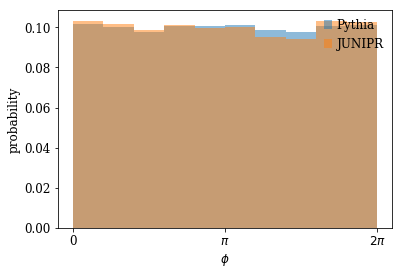

In [11]:
t = None
plt.bar(*p_phi(PYTHIA_val['branchings_p'], PYTHIA_val['branchings_counts'], t=t), label = 'Pythia', **PLOT_BRANCH_SETTINGS)
plt.bar(*p_phi(JUNIPR_val['branchings_p'], JUNIPR_val['branchings_counts'], t=t), label = 'JUNIPR', **PLOT_BRANCH_SETTINGS)
plt.xlabel('$\\phi$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([0, np.pi, 2* np.pi], [0,'$\pi$', '$2\pi$'])
plt.legend()
plt.show()

## delta

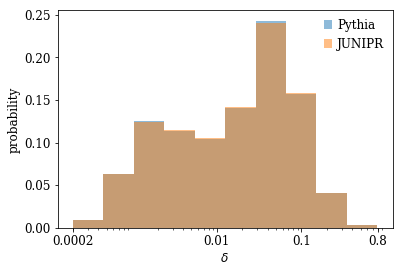

In [12]:
t = None
plt.bar(*p_delta(PYTHIA_val['branchings_d'], PYTHIA_val['branchings_counts'], t=t), label = 'Pythia', **PLOT_BRANCH_SETTINGS)
plt.bar(*p_delta(JUNIPR_val['branchings_d'], JUNIPR_val['branchings_counts'], t=t), label = 'JUNIPR', **PLOT_BRANCH_SETTINGS)
plt.xscale('log')
plt.xlabel('$\\delta$ ' + t_label(t))
plt.ylabel('probability')
plt.xticks([2e-4, 0.01, 0.1, 0.8], [2e-4, 0.01, 0.1, 0.8])
plt.legend()
plt.show()